In [3]:
################## IMPORT LIBRARIES ##################

import numpy as np
import sys
import importlib
import random 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 3)
import torch 

In [4]:
################## IMPORT MY MODULES ##################
sys.path.append('../src')

import helpers as hlp
import evaluation
import dataset as ds
import trainer
import models

importlib.reload(evaluation)
importlib.reload(hlp)
importlib.reload(ds)
importlib.reload(trainer)
importlib.reload(models)

<module 'models' from '/home/ubuntu/guestxr2/home/ubuntu/joanna/CWUNET/notebooks/../src/models.py'>

In [5]:
################## LOAD TRAINING RESULTS AND CONFIG  ##################

datapath="/home/ubuntu/guestxr2/home/ubuntu/joanna/CWUNET/results/"
exp_tag=""
train_tag="big_1"

# load the best checkpoint from the training
config ,train_results = trainer.load_train_results(datapath, exp_tag, train_tag,configtype="yaml") 

In [6]:
################## LOAD DATASET ##################

# instantiate a test data set 
config["df_metadata"]="/home/ubuntu/guestxr2/home/ubuntu/joanna/CWUNET/dataset-metadata/ds1_metadata_big.csv"
config["split"]="test"
config["p_noise"]=0
dataset=ds.DatasetReverbTransfer(config)

In [7]:
################## LOAD MODELS AND TRAINING WEIGHTS  ##################

model=trainer.load_chosen_model(config,config["modeltype"])
model.load_state_dict(train_results["model_state_dict"])


<All keys matched successfully>

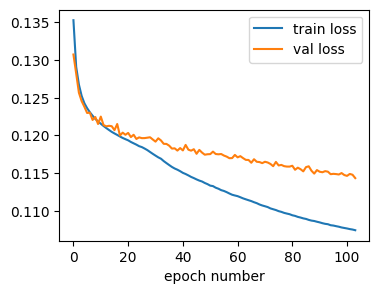

In [8]:
################## PLOT TRAINING LOSS EVOLUTION  ##################

# load and plot the loss evolution 
loss = list(zip(*train_results['loss']))
plt.figure()
plt.plot(loss[0],label="train loss")
plt.plot(loss[1],label="val loss")
plt.xlabel("epoch number")
plt.legend()
plt.show()

In [9]:
################## SEARCH FOR DATA POINTS FROM TEST SET WITH SPECIFIC RT60 VALUES   ##################

# choose indices from a data set with specified difference
chosen_rt60_idx_list=dataset.get_idx_with_rt60diff(-2,-0.85)
# chosen_rt60_idx_list=dataset.get_idx_with_rt60diff(0.8,2)
len(chosen_rt60_idx_list)

28

In [11]:
################## INFERENCE FOR ONE DATA SAMPLE  ##################

dp=chosen_rt60_idx_list[random.randint(0, len(chosen_rt60_idx_list) - 1)]
sContent,sStyle,sTarget,sPrediction=trainer.infer(model,dataset[dp],config["device"])

In [ ]:
################## PLOT AND PLAY BACK CONTENT, STYLE, TARGET AND PREDICTION ##################

audios=[sContent, sStyle, sTarget, sPrediction]
names=["sContent", "sStyle", "sTarget", "sPrediction"]

plt.figure()
for i,audio in enumerate(audios):
    print(names[i]+":")
    plt.subplot(4,1,i+1) 
    audio=audio.squeeze(0).cpu()
    if i==3:
        audio=audio.squeeze(0)
    # wavfile.write("sounds/dp_"+str(dp)+"_"+names[i]+".wav", int(48e3), audio.numpy())
    plt.plot(audio)
    plt.show()
    display(Audio(audio,rate=48e3))
    plt.figure(figsize=(2,2))
    hlp.plotspectrogram(audio[:49152].unsqueeze(0).numpy(), 48e3, 1024, 512, "gnuplot2",names[i])
    plt.show()